In [ ]:
import tensorflow as tf

Returns your IP address in a JSON


In [ ]:
import requests
r = requests.get('https://api.ipify.org?format=json')
print(r.json())

{'ip': '34.73.228.192'}


# Train the model for the Fashion MNIST dataset

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

Load in the data

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:",x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


The data is only 2D

Convolution expects height x widht x color (3D)

In [ ]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


Number of classes

In [ ]:
k = len(set(y_train))
K = len(set(y_train))
print("number of classes:", k)

number of classes: 10


Build the model using the funcional API

In [ ]:
i = Input(x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)

Compile and fit

Note: make sure you are using the GPU for this

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.5225 - accuracy: 0.8059 - val_loss: 0.4090 - val_accuracy: 0.8508
Epoch 2/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3662 - accuracy: 0.8626 - val_loss: 0.3479 - val_accuracy: 0.8689
Epoch 3/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3174 - accuracy: 0.8812 - val_loss: 0.3358 - val_accuracy: 0.8726
Epoch 4/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2815 - accuracy: 0.8944 - val_loss: 0.2959 - val_accuracy: 0.8900
Epoch 5/15
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2556 - accuracy: 0.9028 - val_loss: 0.3018 - val_accuracy: 0.8881
Epoch 6/15
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2323 - accuracy: 0.9117 - val_loss: 0.3001 - val_accuracy: 0.8931
Epoch 7/15
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2123 - accuracy: 0.9188 - val_loss: 0.3019 -

Save the model to a temporary directory

In [ ]:
import tempfile
import os

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))
if os.path.isdir(export_path):
  print('\nAlready saved a model, cleaning up\n')
  !rm -r {export_path}

tf.saved_model.save(model, export_path)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/1


Already saved a model, cleaning up




Saved model:
total 192
drwxr-xr-x 2 root root   4096 Jul 16 16:50 assets
-rw-r--r-- 1 root root     56 Jul 16 16:50 fingerprint.pb
-rw-r--r-- 1 root root 183294 Jul 16 16:50 saved_model.pb
drwxr-xr-x 2 root root   4096 Jul 16 16:50 variables


In [ ]:
!saved_model_cli show --dir {export_path} --all

2023-07-16 16:13:43.152939: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: serving_default_input_1:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict
The Met

This is the same as you would do from your command line, but without the [arch=amd64], and no sudo

 You would instead do:

In [ ]:

# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  32700      0 --:--:-- --:--:-- --:--:-- 32700
OK
Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:5 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:7 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRel

In [ ]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tensorflow-model-server is already the newest version (2.12.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [ ]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=fashion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [ ]:
!tail server.log

[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 245] NET_LOG: Entering the event loop ...


Label mapping

In [ ]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

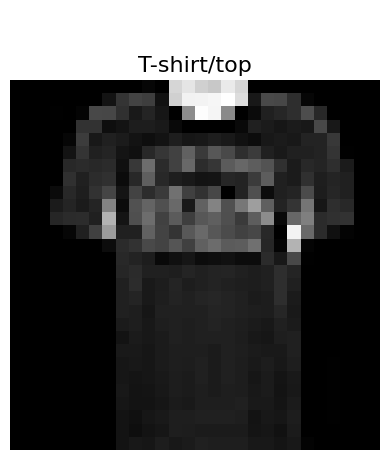

In [ ]:
import matplotlib.pyplot as plt
def show(idx, title):
  plt.figure()
  plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
  plt.axis('off')
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

i = np.random.randint(0, len(x_test))
show(i, labels[y_test[i]])

Format some data to pass to the server

In [ ]:

# {
#   "signature_name": "serving_default",
#   "instances": [ an N x H x W x C list ],
# }

import json
data = json.dumps({"signature_name": "serving_default", "instances": x_test[0:3].tolist()})
print(data)

{"signature_name": "serving_default", "instances": [[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], 

In [ ]:
headers = {"content-type": "application/json"}
r = requests.post('http://localhost:8501/v1/models/fashion_model:predict', data=data, headers=headers)
j = r.json()
print(j.keys())
print(j)

dict_keys(['predictions'])
{'predictions': [[5.3340834e-09, 1.82108625e-12, 5.34569686e-08, 8.99718e-10, 1.01090844e-10, 0.00066437549, 3.63611719e-07, 0.0253391657, 4.11670662e-05, 0.973954856], [6.10529e-06, 2.79080209e-12, 0.999144316, 1.73272208e-09, 0.000830328558, 2.20405745e-24, 1.91993258e-05, 1.16770105e-27, 1.39514025e-11, 6.73823124e-22], [1.41245993e-08, 1.0, 1.62321302e-11, 1.93035632e-09, 1.93013799e-10, 1.02966253e-13, 9.73994704e-11, 1.37926569e-17, 2.43153024e-12, 3.49215246e-16]]}


It looks like a 2-D array, let's check its shape

This is the N x K output array from the model

pred[n, k] is the probability that we believe the nth sample belongs to the kth class

In [ ]:
pred = np.array(j['predictions'])
print(pred.shape)

(3, 10)


Get the predicted classes

In [ ]:
pred = pred.argmax(axis=1)

Map them back to strings

In [ ]:
pred = [labels[i] for i in pred]
print(pred)

['Ankle boot', 'Pullover', 'Trouser']


Get the true labels

In [ ]:
actual = [labels[i] for i in y_test[:3]]
print(actual)

['Ankle boot', 'Pullover', 'Trouser']


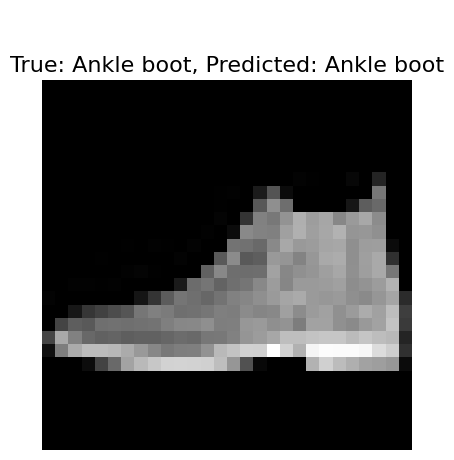

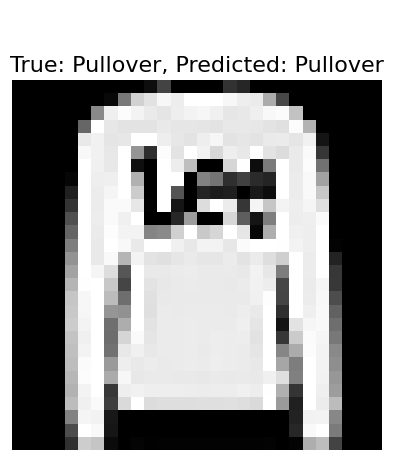

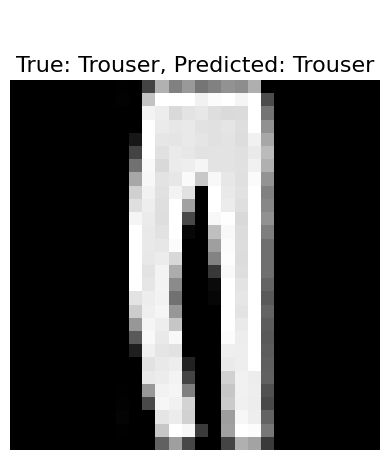

In [ ]:
for i in range(3):
  show(i, f'True: {actual[i]}, Predicted: {pred[i]}')

Allows you to select a model by version

In [ ]:
headers = {"content-type": "application/json"}
r = requests.post('http://localhost:8501/v1/models/fashion_model/versions/1:predict', data=data, headers=headers)
j = r.json()
pred = np.array(j['predictions'])
pred = pred.argmax(axis=1)
pred = [labels[i] for i in pred]
for i in range(0,3):
  show(i, f"True: {actual[i]}, Predicted: {pred[i]}")

KeyError: ignored

Let's make a new model version

Build the model using the functional API

In [ ]:

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Flatten()(x)
x = Dense(K, activation='softmax')(x)

model2 = Model(i, x)
model2.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 32)        320       
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 18s 8ms/step - loss: 0.4818 - accuracy: 0.8323 - val_loss: 0.4049 - val_accuracy: 0.8579
Epoch 2/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3514 - accuracy: 0.8762 - val_loss: 0.3636 - val_accuracy: 0.8695
Epoch 3/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3114 - accuracy: 0.8891 - val_loss: 0.3343 - val_accuracy: 0.8798
Epoch 4/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2853 - accuracy: 0.8992 - val_loss: 0.3236 - val_accuracy: 0.8861
Epoch 5/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2670 - accuracy: 0.9035 - val_loss: 0.3136 - val_accuracy: 0.8903
Epoch 6/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2511 - accuracy: 0.9093 - val_loss: 0.3088 - val_accuracy: 0.8918
Epoch 7/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2374 - accuracy: 0.9142 - val_loss: 0.2997 - val_a

Save version 2 of the model

In [ ]:
version = 2
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))
if os.path.isdir(export_path):
  print('\nAlready saved a model, cleaning up\n')
  !rm -r {export_path}

tf.saved_model.save(model2, export_path)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/2


Already saved a model, cleaning up




Saved model:
total 72
drwxr-xr-x 2 root root  4096 Jul 16 16:50 assets
-rw-r--r-- 1 root root    59 Jul 16 16:50 fingerprint.pb
-rw-r--r-- 1 root root 61163 Jul 16 16:50 saved_model.pb
drwxr-xr-x 2 root root  4096 Jul 16 16:50 variables


Will Tensorflow serving know about the new model without restarting?

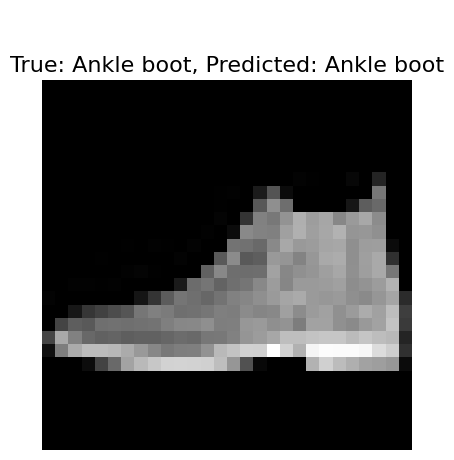

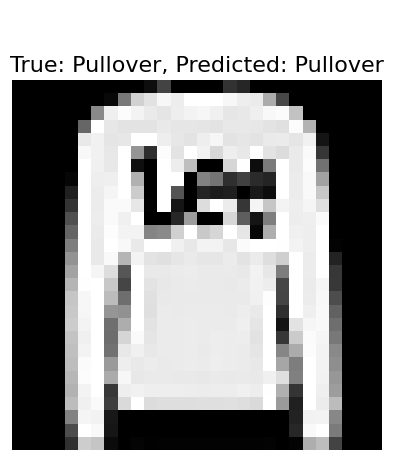

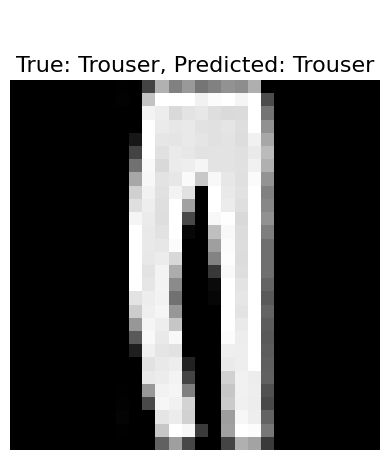

In [ ]:
headers = {"content-type": "application/json"}
r = requests.post('http://localhost:8501/v1/models/fashion_model/versions/2:predict', data=data, headers=headers)
j = r.json()
pred = np.array(j['predictions'])
pred = pred.argmax(axis=1)
pred = [labels[i] for i in pred]
for i in range(0,3):
  show(i, f"True: {actual[i]}, Predicted: {pred[i]}")


What if we use a version number that does not exist?


In [ ]:
headers = {"content-type": "application/json"}
r = requests.post('http://localhost:8501/v1/models/fashion_model/versions/3:predict', data=data, headers=headers)
j = r.json()
print(j)

{'error': 'Servable not found for request: Specific(fashion_model, 3)'}
